In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle   

C:\Users\harinarayan\Anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

C:\Users\harinarayan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### LOADING FINAL DATA

In [3]:
with open('final_analysis_file.pkl', 'rb') as pickle_file:
    final=pickle.load( pickle_file)

In [4]:
final.shape

(60000, 52)

In [5]:
final.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,Time,s_Score
0,0.177093,0.242106,0.056785,-0.108356,0.049898,0.365580,-0.230403,-0.282035,0.537327,0.315228,...,-0.688442,0.541719,0.343971,0.529262,0.202866,-0.640193,-0.069127,-0.008858,1300320000,1
1,0.335403,0.269931,-0.439159,-0.235786,-0.585301,-0.044164,-0.489693,0.145499,-0.221961,0.081096,...,-0.416241,-0.139369,0.128020,0.291305,-0.194745,-0.228211,0.087916,-0.058784,1345161600,1
2,-0.071428,0.418853,0.030652,-0.623154,-0.008004,0.430800,-0.101884,0.443732,-0.397712,1.164939,...,-0.348121,-0.404755,1.214722,-0.179276,-1.291663,-0.897769,-0.466101,-0.292461,1278374400,0
3,0.472152,0.529163,-0.007123,0.145510,-0.326849,-0.414855,-0.076689,-0.674746,-0.339968,0.669331,...,-0.694976,0.906715,-0.106348,-0.490650,0.080084,-0.358495,-0.278575,0.099384,1256169600,1
4,0.697582,0.652345,-0.234955,0.049723,0.136823,0.010255,-0.666608,-0.130333,0.921492,0.146175,...,-0.380073,0.235769,0.388563,0.243572,0.529020,-0.504115,-0.529403,0.222584,1348099200,1


### SORTING A DATA ACCORDING TO TIME

In [6]:
final_analysis_file=final.sort_values("Time")

In [7]:
final_analysis_file.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,Time,s_Score
38180,0.602437,0.717449,-0.631567,0.260387,0.330484,-0.055587,-0.389079,-0.270185,0.906017,0.195388,...,-0.251031,-0.041619,0.135714,0.076842,-0.736343,-0.281863,0.117228,-0.568302,944092800,1
49777,0.492333,-0.046621,0.293875,-0.097375,-0.173121,-0.026032,-0.578320,0.270436,-0.023428,0.168562,...,-0.472488,0.411475,0.035933,-0.469890,-0.006321,0.035528,-0.556103,0.287973,944438400,1
8804,-0.293306,-0.034618,-0.026011,0.304537,-0.098707,0.457255,-0.723094,-0.013567,0.762381,-0.135857,...,-0.581932,0.086664,-0.275735,0.235347,-0.841990,-0.334346,0.000593,0.290634,965779200,1
37791,0.134831,-0.057482,-0.097083,0.539844,0.079523,0.727579,-0.996090,-0.034164,0.530371,-0.268936,...,-0.658511,-0.024503,-0.555756,0.444350,-0.365405,-0.750380,0.009156,0.270973,966297600,1
23074,0.385678,0.524573,-1.609854,0.161960,0.575866,0.546592,-0.977845,0.828146,0.277647,1.273623,...,0.137208,-0.447914,-0.188943,-0.011633,-1.285488,-0.984702,-0.511050,0.356079,975974400,1


### REMOVING ALL NAN VALUES

In [8]:
final_analysis_file= final_analysis_file[~np.isnan(final_analysis_file).any(axis = 1)]
final_analysis_file.shape

(59080, 52)

### SEPERATING FEATURE AND RESULT

In [10]:
X=final_analysis_file.iloc[: , 0:50].values
y=final_analysis_file.iloc[: ,51].values
print(X[:2,:])
print(y[:2])

[[ 0.60243696  0.71744931 -0.6315674   0.26038718  0.33048366 -0.05558743
  -0.38907857 -0.27018475  0.90601682  0.19538827  0.44134503  0.65585296
   0.08961625  0.2233037  -0.26983613 -0.23484565 -0.14630604  0.48827992
   0.04616021 -0.22656861  0.30766356 -0.28599655 -0.41142982 -0.47797277
  -0.15800801 -0.61701785  0.96566806 -0.47943768 -0.80317549  0.16155054
   0.02699368  0.91441969 -0.71122471  0.25849211 -0.38259776  0.38540479
   0.21978822 -0.81212574 -0.06407028 -0.06479076 -0.80488834 -0.76818657
  -0.25103089 -0.04161918  0.13571379  0.07684196 -0.73634269 -0.28186342
   0.11722819 -0.56830231]
 [ 0.49233315 -0.04662084  0.29387484 -0.09737546 -0.17312114 -0.02603162
  -0.57831992  0.27043602 -0.02342819  0.16856213 -0.75815315 -0.44313496
   0.30434961  0.11258636  0.27021512  0.09368142 -0.13209185  0.21844961
   0.07928748  0.13234145 -0.08717376 -0.14682331 -0.7461824  -0.54296494
  -0.3089344   0.11425101 -0.38790868  0.33053727 -0.66764264 -0.14574608
   0.937961

### FEATURE SCALING

In [11]:
s = StandardScaler() #COLUMN STANDARISE
X = s.fit_transform(X)
X[:1, :]

array([[ 1.21081484,  1.44997468, -0.57445827,  0.69472747,  1.35878575,
        -0.24258234,  0.45972151, -0.62241269,  1.07017939,  0.32991977,
         0.92556402,  1.73886296, -0.42719451,  0.08403465, -0.95130906,
        -1.19272316, -0.05257784,  0.27877926,  0.46801941, -0.6053098 ,
         0.40106042, -0.91206512, -0.49963629, -1.29725236, -0.00650862,
        -0.95206712,  1.04520234, -1.19553919, -0.41720039, -0.56033666,
        -0.46870564,  0.92331837, -1.50777333,  0.98809655, -0.53653123,
         0.68592588,  0.94481819, -0.42784871, -0.75792318,  0.30553145,
        -0.86161786, -0.61130493,  0.08971419,  0.10408738,  0.00816514,
        -0.11705492, -0.83484902,  0.37860005,  0.33081983, -1.20437378]])

## KNN WITH K-FOLD CV (K=5)

#### Splitting the data into Train and Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### K vs Test Accuracy - Finding the right value of K

In [12]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv scores
cv_scores = []
# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(k)
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49

The optimal number of neighbors is 23.


#### the above printed value is just for cheaking the program running properly or it will go into infinite .

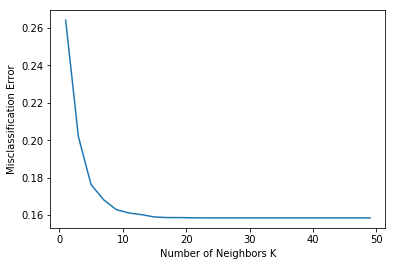

In [13]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#### FINDING THE OPTIMAL K VALUE

#### Fitting KNN to the  Training set results

In [14]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

#### Predicting and Visualising Test set results

In [15]:
y_pred = classifier.predict(X_test)

#### Predicting the test results accuracy¶

In [16]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

84.568946061837053

## SIMPLE KNN WITHOUT CV

#### spliting the data set into folllowing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### finding optimal value of k and visualising using graph


The optimal number of neighbors is 21.


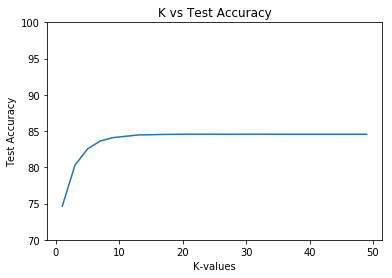

In [13]:
k_list = list(range(1,50,2))
acc_list = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)    ## Predicting the accuracy on test set
    acc_list.append(accuracy_score(y_test, y_pred, normalize=True) * float(100))
optimal_k = k_list[acc_list.index(max(acc_list))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
plt.plot(k_list, acc_list)
plt.xlabel('K-values')
plt.ylabel('Test Accuracy')
plt.title('K vs Test Accuracy')
plt.ylim(70, 100)
plt.show()

#### Fitting KNN to the Training set results

In [14]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)    ## Change the values of n_neighbors
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

#### Predicting and Visualising Test set results

In [15]:
y_pred = classifier.predict(X_test)

####  Predicting the test results accuracy¶

In [16]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

84.568946061837053

## KNN WITH SIMPLE CROSS VALIDATION

#### spliting the data set into folllowing¶

In [18]:
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size = 0.3, random_state = 123)

#### finding optimal value of k and visualising using graph

...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...
...

The optimal number of neighbors is 15.


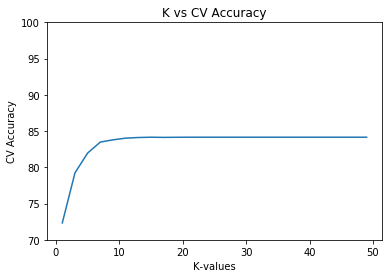

In [19]:
k_list = list(range(1,50,2))
acc_list = []
for k in k_list:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_cv)    ## Predicting the accuracy on CV set
    acc_list.append(accuracy_score(y_cv, y_pred, normalize=True) * float(100))
    print("...")
optimal_k = k_list[acc_list.index(max(acc_list))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)
plt.plot(k_list, acc_list)
plt.xlabel('K-values')
plt.ylabel('CV Accuracy')
plt.title('K vs CV Accuracy')
plt.ylim(70,100)
plt.show()

#### Fitting KNN to the Training set results

In [20]:
classifier = KNeighborsClassifier(n_neighbors = optimal_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

####  Predicting Test set results

In [21]:
y_pred = classifier.predict(X_test)

#### Predicting the test results accuracy¶

In [22]:
acc = accuracy_score(y_test, y_pred, normalize=True) * float(100)
acc

84.540735725569846

In [23]:
 from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test, y_pred).T

array([[    4,     8],
       [ 2732, 14980]], dtype=int64)